# Advanced Object Oriented Programming

In this section we'll dive deeper into

Multiple Inheritance

 The self keyword 

Method Resolution Order (MRO) 

Python's built-in super() function

## Class and Objects Revisited

Classes and objects are the two main aspects of object-oriented programming.

A class is a template for objects, and an object is an instance of a class.

When the individual objects are created, they inherit all the variables and functions from the class.

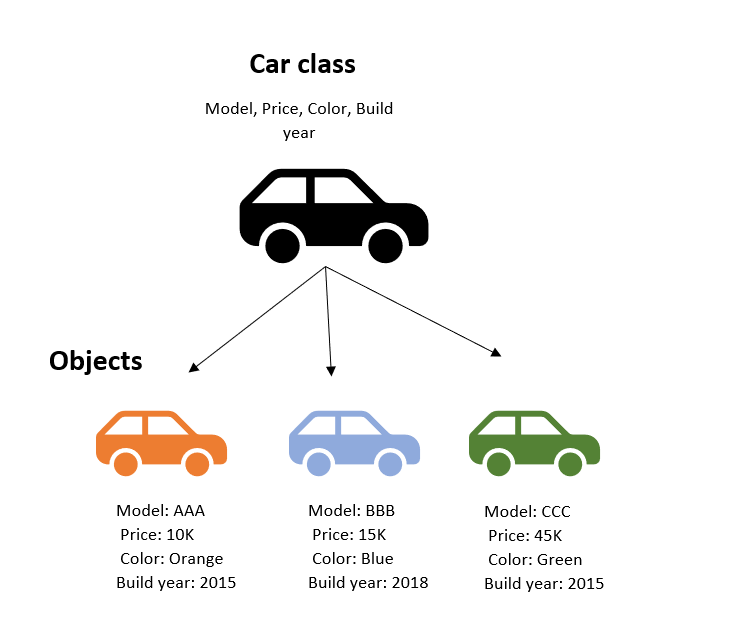

In [12]:
#Just for reference purpose
from PIL import Image
example_image = Image.open('Car_Class.png')
example_image

In [3]:
#Class example
class Car:                                    #Class car
    def __init__(myself,model,year,color):    #Different parametters in the Constructor of the class __init__
        myself.model = model                  #myself is a Parametter, is used to access variables that belongs to the class.
        myself.year = year
        myself.color = color
car1=Car("AAA",2015,"Orange")                 #passing arguments
car2=Car("BBB",2018,"Blue")
car3=Car("CCC",2015,"Green")

print(car1.color)                             #printing the value using the object car1, car2,....
print(car2.model)

Orange
BBB


In [6]:
len(dir(Car))       #printing no. of Special Methods for classes

26

In [4]:
#printing all Special Methods for classes
for x in dir(Car):
    print(x)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__


For more information on Special Methods for classes

https://docs.python.org/3/reference/datamodel.html#special-method-names

## Self keyword

The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.


The Object is passed into the self parameter so that the object can keep hold of its own data.

In [48]:
class Person:                            #Class name in Pascal case
    def __init__(self, fname, lname):
        self.firstname = fname
        self.lastname = lname

    def print_firstname(self):
        print(self.firstname)
    
    def print_lastname(self):
        print(self.lastname)

#Use the Person class to create an object, and then execute the printfname and printlnamemethod:

objectx = Person("John", "Wick")
objectx.print_firstname()
objectx.print_lastname()


John
Wick


Python classes have a special method named __init__ which is automatically executed when an instance of the class is created in memory.

## Inheritance Revisited

Inheritance allows us to define a class that inherits all the methods and properties from another class.

Parent class is the class being inherited from, also called base class.

Child class is the class that inherits from another class, also called derived class.

In [51]:
class Animal:                    #Base Class or Super class
    def __init__(self, name):    # Constructor of the class
        self.name = name

    def speak(self):              # Abstract method, defined by convention only
        raise NotImplementedError("Subclass must implement abstract method!")


class Dog(Animal):              #Derived class 1 or sub class
    def speak(self):
        return self.name+' says Woof!'
    
class Cat(Animal):              #Derived class 2
    def speak(self):
        return self.name+' says Meow!'
    
obj1 = Dog('Fido')
obj2 = Cat('Isis')

print(obj1.speak())
print(obj2.speak())

Fido says Woof!
Isis says Meow!


In [52]:
#-------------------------

In this example, the derived classes did not need their own __init__ methods because the base class __init__ gets called automatically. However, if you do define an __init__ in the derived class, this will override the base:

In [19]:
class Animal:
    def __init__(self,name,legs):
        self.name = name
        self.legs = legs

class Bear(Animal):             #It will override the base class
    def __init__(self,name,legs=4,hibernate='yes'):
        self.name = name
        self.legs = legs
        self.hibernate = hibernate


why inherit from Animal if we can't use its constructor? The answer is to call the Animal __init__ inside our own __init__.

In [20]:
class Animal:
    def __init__(self,name,legs):
        self.name = name
        self.legs = legs

class Bear(Animal):          
    def __init__(self,name,legs=4,hibernate='yes'):
        Animal.__init__(self,name,legs)        #using class_name . __init__ to obtain all parameter from that class
        self.hibernate = hibernate
        
yogi = Bear('Yogi')
print(yogi.name)
print(yogi.legs)
print(yogi.hibernate)

Yogi
4
yes


## Multiple Inheritance

When a class is derived from more than one base class it is called multiple Inheritance. The derived class inherits all the features of the base case.

In [64]:
class Car:                       #Base class
    def __init__(self,wheels=4):
        self.wheels = wheels
        # We'll say that all cars, no matter their engine, have four wheels by default.

class Gasoline(Car):
    def __init__(self,engine='Gasoline',tank_cap=20):
        Car.__init__(self)        #using class_name . __init__ to obtain all parameter from that class
        self.engine = engine
        self.tank_cap = tank_cap # represents fuel tank capacity in gallons
        self.tank = 0
        
    def refuel(self):
        self.tank = self.tank_cap
        
    
class Electric(Car):
    def __init__(self,engine='Electric',kWh_cap=60):
        Car.__init__(self)
        self.engine = engine
        self.kWh_cap = kWh_cap # represents battery capacity in kilowatt-hours
        self.kWh = 0
    
    def recharge(self):
        self.kWh = self.kWh_cap

We can create a derived class that inherits from both!

In [65]:
class Hybrid(Gasoline, Electric):                    #Multiple inheritance
    def __init__(self,engine='Hybrid',tank_cap=11,kWh_cap=5):
        Gasoline.__init__(self,engine,tank_cap)      #(self,Hybrid,11)
        Electric.__init__(self,engine,kWh_cap)       #(self,Hybrid,5)
        
        
prius = Hybrid()
print(prius.tank)
print(prius.kWh)

0
0


In [56]:
prius.recharge()
print(prius.kWh)

5


## Why do we use self?

We've seen the word "self" show up in almost every example. What's the deal? The answer is, Python uses `self` to find the right set of attributes and methods to apply to an object. When we say:

    prius.recharge()

What really happens is that Python first looks up the class belonging to `prius` (Hybrid), and then passes `prius` to the `Hybrid.recharge()` method.

It's the same as running:

    Hybrid.recharge(prius)
    
but shorter and more intuitive!

## Method Resolution Order (MRO)

Things get complicated when you have several base classes and levels of inheritance. This is resolved using Method Resolution Order - a formal plan that Python follows when running object methods.

To illustrate, if classes B and C each derive from A, and class D derives from both B and C, which class is "first in line" when a method is called on D?
Consider the following:

In [26]:
class A:       #Base Class or Super class
    num = 4
    
class B(A):
    pass

class C(A):
    num = 5
    
class D(B,C):
    pass

In [27]:
D.num

5

Schematically, the relationship looks like this:


         A
       num=4
      /     \
     /       \
     B       C
    pass   num=5
     \       /
      \     /
         D
        pass

Here `num` is a class attribute belonging to all four classes. So what happens if we call `D.num`?

You would think that `D.num` would follow `B` up to `A` and return **4**. Instead, Python obeys the first method in the chain that *defines* num. The order followed is `[D, B, C, A, object]` where *object* is Python's base object class.

In our example, the first class to define and/or override a previously defined `num` is `C`.

In [72]:
#Example
class A:         #Base Class or Super class
    def method(self):
        print("A.method")

class B:
    def method(self):
        print("B.method")

class C(B, A):
    pass

class D(C, B):
    pass

d = D()
d.method()

B.method


## super()

Python's built-in `super()` function provides a shortcut for calling base classes, because it automatically follows Method Resolution Order.

In its simplest form with single inheritance, `super()` can be used in place of the base class name :

In [28]:
class MyBaseClass:           #Base Class or Super class
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
class MyDerivedClass(MyBaseClass):
    def __init__(self,x,y,z):
        super().__init__(x,y)
        self.z = z
    

Note that we don't pass `self` to `super().__init__()` as `super()` handles this automatically.

In a more dynamic form, with multiple inheritance like the "diamond diagram" shown above, `super()` can be used to properly manage method definitions:

In [73]:
class A:                   #Base Class or Super class
    def truth(self):
        return 'All numbers are even'
    
class B(A):
    pass

class C(A):
    def truth(self):
        return 'Some numbers are even'
    

In [74]:
class D(B,C):
    def truth(self,num):
        if num%2 == 0:
            return A.truth(self)
        else:
            return super().truth()

In [75]:
d = D()
d.truth(6)

'All numbers are even'

In [44]:
d.truth(5)

'Some numbers are even'